In [11]:
import cv2
import mediapipe as mp
import urllib.request
import numpy as np
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import PyQt5
from PIL import Image
from IPython.display import Video
import nb_helpers

In [12]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh

In [13]:
mp_face_mesh.FACEMESH_IRISES

frozenset({(469, 470),
           (470, 471),
           (471, 472),
           (472, 469),
           (474, 475),
           (475, 476),
           (476, 477),
           (477, 474)})

In [14]:
face_image_filename = "Photo1.jpg"
img = Image.open(face_image_filename)

In [15]:
# Define image filename and drawing specifications
file = face_image_filename
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Create a face mesh object
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.95,
) as face_mesh:

    # Read image file with cv2 and process with face_mesh
    image = cv2.imread(file)
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Define boolean corresponding to whether or not a face was detected in the image
face_found = bool(results.multi_face_landmarks)

I0000 00:00:1709757880.881821       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1 Pro


In [16]:
def display_image(filename):
    img = Image.open(filename)
    img = img.resize((700, 500))
    display(img)

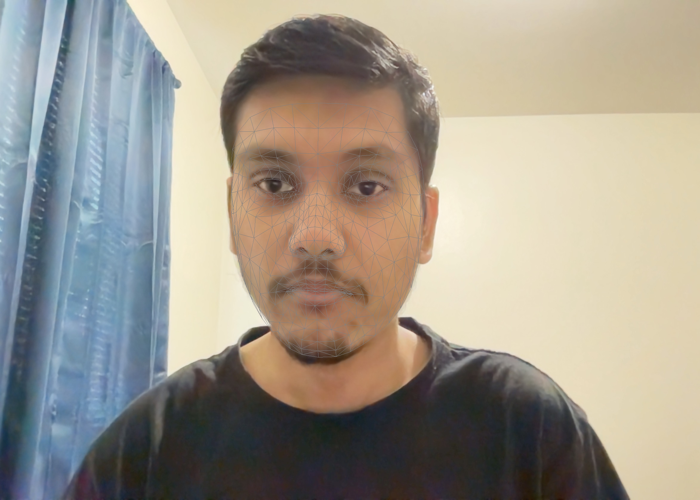

In [17]:
if face_found:
    # Create a copy of the image
    annotated_image = image.copy()

    # Draw landmarks on face
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=results.multi_face_landmarks[0],
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style(),
    )

    # Save image
    cv2.imwrite("face_tesselation_only.png", annotated_image)


display_image("face_tesselation_only.png")

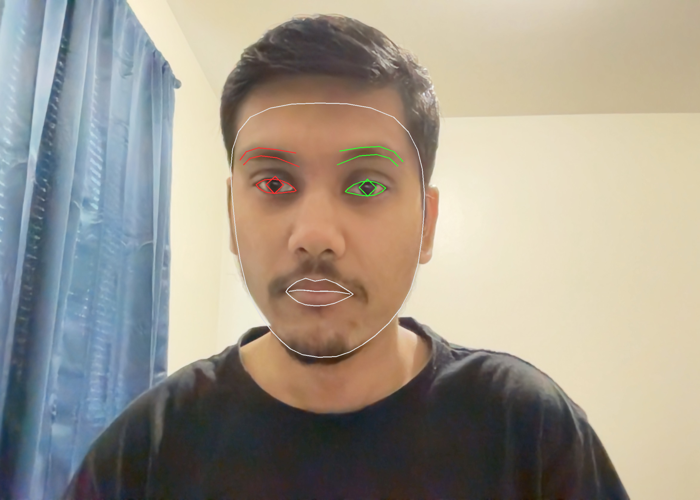

In [18]:
if face_found:
    # Create a copy of the image
    annotated_image = image.copy()

    # For each face in the image (only one in this case)
    for face_landmarks in results.multi_face_landmarks:

        # Draw the facial contours of the face onto the image
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style(),
        )

        # Draw the iris location boxes of the face onto the image
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style(),
        )

    # Save the image
    cv2.imwrite("face_contours_and_irises.png", annotated_image)

display_image("face_contours_and_irises.png")

In [19]:
results.multi_face_landmarks

[landmark {
   x: 0.45010525
   y: 0.56248796
   z: -0.031785354
 }
 landmark {
   x: 0.44914097
   y: 0.50201917
   z: -0.06389477
 }
 landmark {
   x: 0.45127508
   y: 0.52018136
   z: -0.032682132
 }
 landmark {
   x: 0.44108447
   y: 0.4335946
   z: -0.048280384
 }
 landmark {
   x: 0.44898024
   y: 0.48138708
   z: -0.06847729
 }
 landmark {
   x: 0.4498237
   y: 0.45387134
   z: -0.064281225
 }
 landmark {
   x: 0.4530476
   y: 0.38642836
   z: -0.03400676
 }
 landmark {
   x: 0.36953843
   y: 0.37571952
   z: 0.022696733
 }
 landmark {
   x: 0.45401475
   y: 0.33546486
   z: -0.027620649
 }
 landmark {
   x: 0.453985
   y: 0.30794197
   z: -0.031093676
 }
 landmark {
   x: 0.45540836
   y: 0.20642793
   z: -0.020046305
 }
 landmark {
   x: 0.45001414
   y: 0.57021016
   z: -0.029895183
 }
 landmark {
   x: 0.45027635
   y: 0.57777154
   z: -0.025649276
 }
 landmark {
   x: 0.45088446
   y: 0.5827185
   z: -0.019185586
 }
 landmark {
   x: 0.45077872
   y: 0.583069
   z: -0.01884

In [20]:
mp_face_mesh.FACEMESH_IRISES

frozenset({(469, 470),
           (470, 471),
           (471, 472),
           (472, 469),
           (474, 475),
           (475, 476),
           (476, 477),
           (477, 474)})